In [11]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import folium


In [12]:
# Load the dataset
url = "globalterrorismdb_0718dist.csv"
df = pd.read_csv(url, encoding='ISO-8859-1')

<ipython-input-12-fe984176ac81>:3: DtypeWarning: Columns (4,6,31,33,61,62,63,76,79,90,92,94,96,114,115,121) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(url, encoding='ISO-8859-1')


In [13]:
# Display basic information about the dataset
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181691 entries, 0 to 181690
Columns: 135 entries, eventid to related
dtypes: float64(55), int64(22), object(58)
memory usage: 187.1+ MB
None


In [14]:
# Summary statistics
print(df.describe())

            eventid          iyear         imonth           iday  \
count  1.816910e+05  181691.000000  181691.000000  181691.000000   
mean   2.002705e+11    2002.638997       6.467277      15.505644   
std    1.325957e+09      13.259430       3.388303       8.814045   
min    1.970000e+11    1970.000000       0.000000       0.000000   
25%    1.991021e+11    1991.000000       4.000000       8.000000   
50%    2.009022e+11    2009.000000       6.000000      15.000000   
75%    2.014081e+11    2014.000000       9.000000      23.000000   
max    2.017123e+11    2017.000000      12.000000      31.000000   

            extended        country         region       latitude  \
count  181691.000000  181691.000000  181691.000000  177135.000000   
mean        0.045346     131.968501       7.160938      23.498343   
std         0.208063     112.414535       2.933408      18.569242   
min         0.000000       4.000000       1.000000     -53.154613   
25%         0.000000      78.000000       

In [15]:
# Count the number of terrorist attacks by country
country_counts = df['country_txt'].value_counts().head(10)

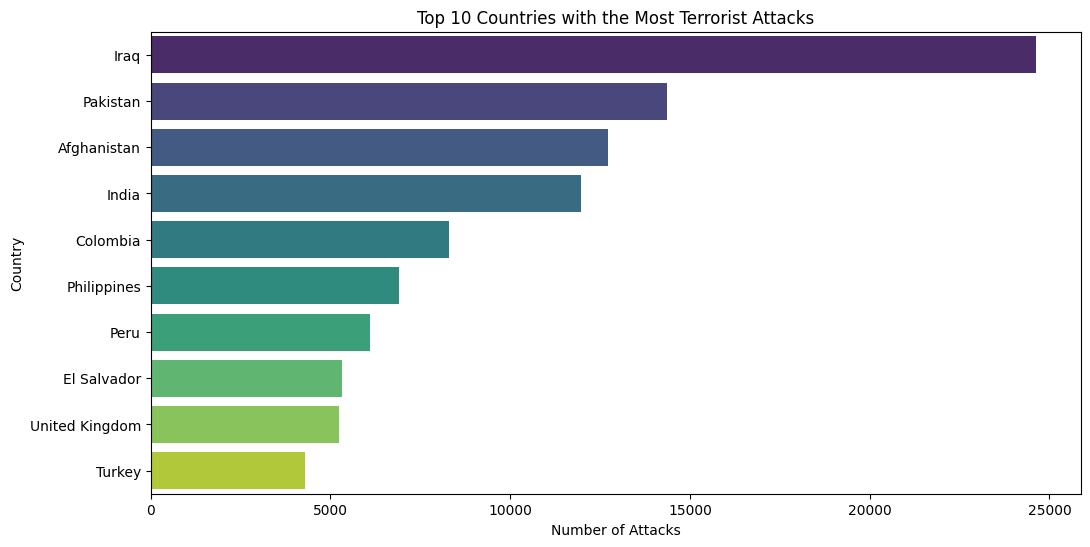

In [16]:
# Create a bar plot for the top 10 countries with the most attacks
plt.figure(figsize=(12, 6))
sns.barplot(x=country_counts.values[:10], y=country_counts.index[:10], palette='viridis')
plt.title('Top 10 Countries with the Most Terrorist Attacks')
plt.xlabel('Number of Attacks')
plt.ylabel('Country')
plt.show()

In [17]:
# Count the number of attacks by region
region_counts = df['region_txt'].value_counts()

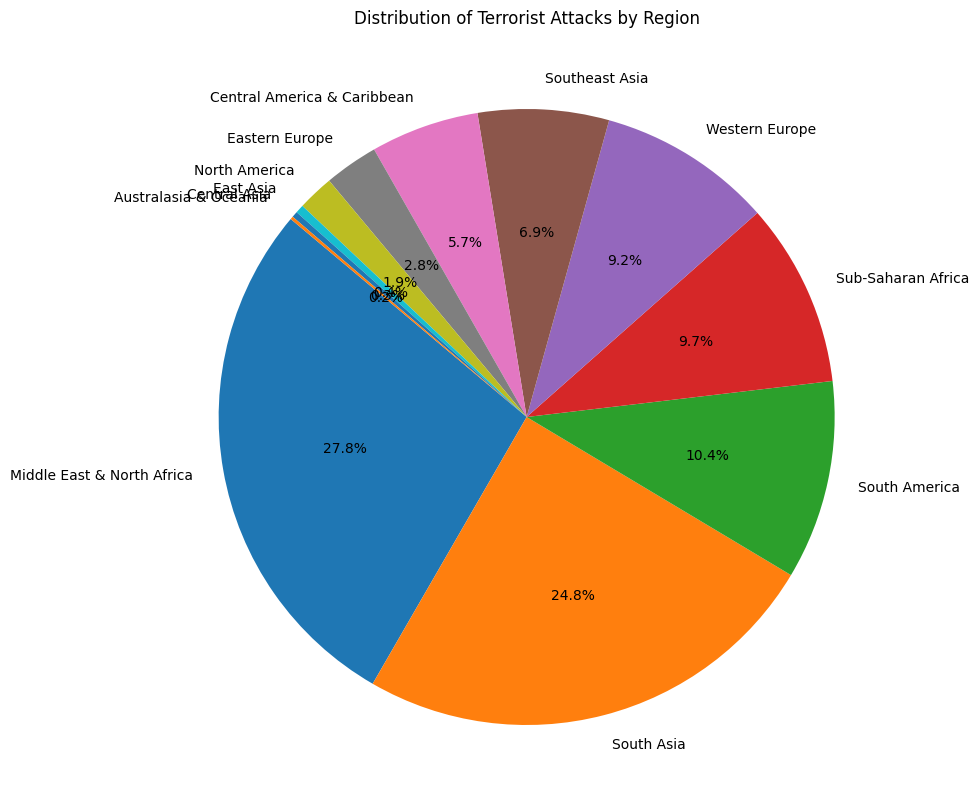

In [18]:
# Create a pie chart for the distribution of attacks by region
plt.figure(figsize=(10, 10))
plt.pie(region_counts, labels=region_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Terrorist Attacks by Region')
plt.show()

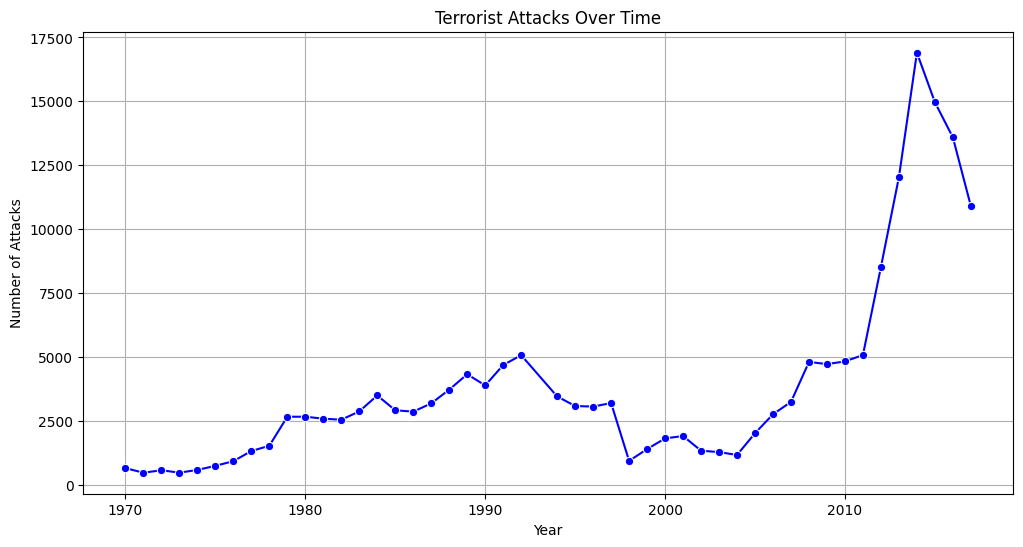

In [19]:
# Convert the 'iyear' column to datetime
df['iyear'] = pd.to_datetime(df['iyear'], format='%Y')

# Group attacks by year and count the number of attacks each year
attacks_by_year = df['iyear'].dt.year.value_counts().sort_index()

# Create a line plot to visualize the temporal patterns
plt.figure(figsize=(12, 6))
sns.lineplot(x=attacks_by_year.index, y=attacks_by_year.values, color='b', marker='o')
plt.title('Terrorist Attacks Over Time')
plt.xlabel('Year')
plt.ylabel('Number of Attacks')
plt.grid(True)
plt.show()

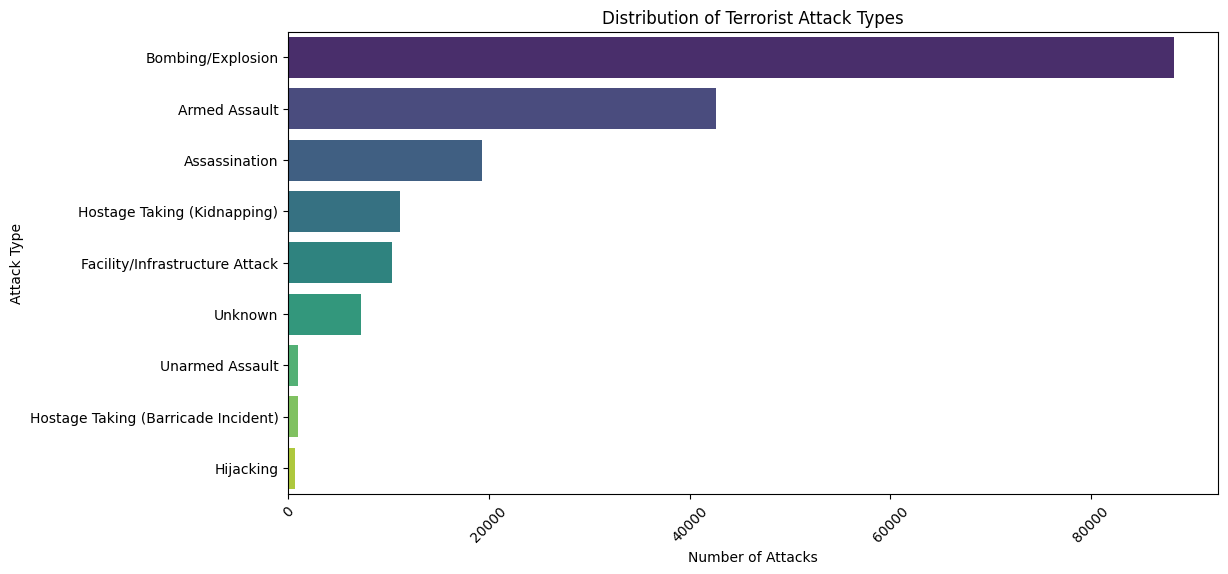

In [20]:
# Count the number of attacks by attack type
attack_type_counts = df['attacktype1_txt'].value_counts()

# Create a bar plot for the distribution of attack types
plt.figure(figsize=(12, 6))
sns.barplot(x=attack_type_counts.values, y=attack_type_counts.index, palette='viridis')
plt.title('Distribution of Terrorist Attack Types')
plt.xlabel('Number of Attacks')
plt.ylabel('Attack Type')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.show()
